In [1]:
import pandas as pd
import numpy as np
from data_utils import put_in_PI, find_angle_id, generate_training_sample
import matplotlib.pyplot as plt
from math import pi
from tqdm import tqdm

# Read data file and extract center camera image

In [2]:
_prefix = "/home/user/Bureau/Dataset/udacity/"
GLOBAL_PREFIX = 'CH3_001_output/'
df = pd.read_csv(_prefix + GLOBAL_PREFIX + 'interpolated.csv')

In [3]:
center_cam_idx = df['frame_id'] == 'center_camera'
center_cam_df = df[center_cam_idx]

In [4]:
# Put angle in [-pi, pi]
center_cam_df['angle'] = center_cam_df['angle'].apply(put_in_PI)

/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [5]:
LEN_SPATIAL_HISTORY = 4
TARGET_FRAME_DIST = 4.  # meter

# Assign steering angle ID

In [6]:
# Define bins_edge
BIN_WIDTH = 5. * pi / 180  # rad
num_bins = int(2*pi / BIN_WIDTH) + 1
bins_edge = [-pi + i*BIN_WIDTH for i in range(num_bins)]
bins_edge[-1] = pi
print("Create histogram with %d bins" % num_bins)

Create histogram with 73 bins


In [7]:
# Append 'steering_id' column to dataframe
center_cam_df['angle_id'] = pd.Series(np.array([-1 for i in range(len(center_cam_df.index))]), 
                                         index=center_cam_df.index)
# Assign steering_id to every row of center_cam_df
for i in tqdm(range(len(center_cam_df))):
    find_angle_id(i, bins_edge, center_cam_df)

/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


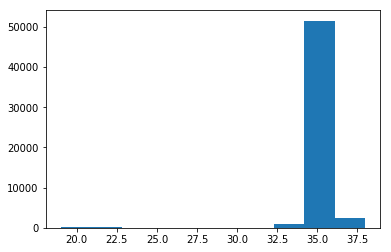

In [8]:
# Histogram of steering_id
_, _, _ = plt.hist(center_cam_df.angle_id)

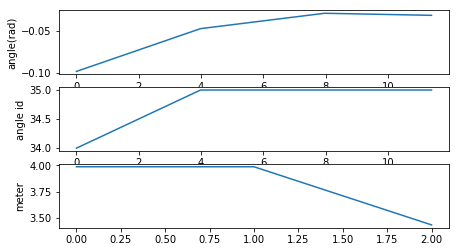

In [9]:
# Check out 1 training sample
out = generate_training_sample(0, center_cam_df, GLOBAL_PREFIX, TARGET_FRAME_DIST, LEN_SPATIAL_HISTORY)

if out:
    plt.figure(figsize=(7, 4))
    plt.subplot(311)
    plt.plot(out['travelled_dist_list'], out['angle_list'])
    plt.ylabel('angle(rad)')
    plt.subplot(312)
    plt.plot(out['travelled_dist_list'], out['angle_id_list'])
    plt.ylabel('angle id')
    plt.subplot(313)
    plt.plot([out['travelled_dist_list'][i+1] - out['travelled_dist_list'][i] for i in range(LEN_SPATIAL_HISTORY)])
    plt.ylabel('meter')
    plt.show()

# Create dataset

In [10]:
dataset = []  # list of dictionary
now_idx_list = np.random.randint(0, high=len(center_cam_df)-1, size=int(0.6 * len(center_cam_df)))

for i in tqdm(now_idx_list):
    sample = generate_training_sample(i, center_cam_df, GLOBAL_PREFIX, TARGET_FRAME_DIST, LEN_SPATIAL_HISTORY)
    if sample:
        # check if sampel is valid
        dataset.append(sample)
    

  1%|▏         | 445/33157 [01:01<1:14:56,  7.28it/s]

KeyboardInterrupt: 

## Output training dataset to csv file

In [ ]:
training_df = pd.DataFrame(dataset)
training_df.to_csv('widthen_bin_' + GLOBAL_PREFIX[:-1] + '.csv')